In [1]:
import timeit
import numpy as np
from functools import partial
import matplotlib.pyplot as plt

from skimage.exposure import histogram
import pyclesperanto_prototype as prototype
from pyclesperanto import Clesperanto

pyclic = Clesperanto()
pyclic.set_wait_for_kernel_to_finish(True)

prototype.select_device()
prototype.set_wait_for_kernel_finish(True)

sizes = [128, 256, 512, 1024, 2048, 4096]

warmup_iter = 3
eval_iter = 5

In [2]:
def benchmark_function(target_function):
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    benchmark_data = []
    for size in sizes:
        # make new data
        image = np.random.rand(size, size)
        # bind target function to given image
        partial_function = partial(target_function, image)
        # warmup       
        warm_up_time_in_s = timeit.timeit(partial_function, number=warmup_iter)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=eval_iter)
        # store results
        benchmark_data.append([size, time_in_s])
    return np.asarray(benchmark_data)

# Histogram

### Pyclesperanto

In [3]:
def pyclic_function(image):
    pyclic.histogram(input_image=image)

In [4]:
pyclic_benchmark_data = benchmark_function(pyclic_function)

Exception caught in Kernel class sum_z_projection. Error when enqueuing NDRange kernel.
Error CL_MEM_OBJECT_ALLOCATION_FAILURE (-4)
	Description: Failed to allocate memory for buffer object
Exception caught in Kernel class sum_z_projection. Error when enqueuing NDRange kernel.
Error CL_MEM_OBJECT_ALLOCATION_FAILURE (-4)
	Description: Failed to allocate memory for buffer object
Exception caught in Kernel class sum_z_projection. Error when enqueuing NDRange kernel.
Error CL_MEM_OBJECT_ALLOCATION_FAILURE (-4)
	Description: Failed to allocate memory for buffer object
Exception caught in Kernel class sum_z_projection. Error when enqueuing NDRange kernel.
Error CL_MEM_OBJECT_ALLOCATION_FAILURE (-4)
	Description: Failed to allocate memory for buffer object
Exception caught in Kernel class sum_z_projection. Error when enqueuing NDRange kernel.
Error CL_MEM_OBJECT_ALLOCATION_FAILURE (-4)
	Description: Failed to allocate memory for buffer object
Exception caught in Kernel class sum_z_projection.

### Prototype

In [5]:
def prototype_function(image):
    prototype.histogram(source=image)
    

In [6]:
prototype_benchmark_data = benchmark_function(prototype_function)

MemoryError: clEnqueueWriteBuffer failed: MEM_OBJECT_ALLOCATION_FAILURE

### Skimage

In [7]:
def skimage_function(image):
    h, bc = histogram(image)

In [8]:
skimage_benchmark_data = benchmark_function(skimage_function)

# Results

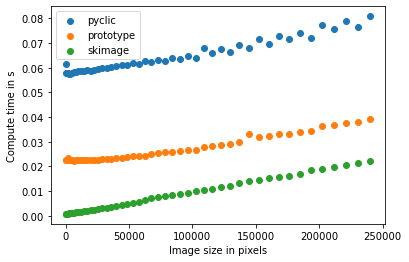

In [6]:
plt.scatter(time_pyclic_size[:,0] ** 2, time_pyclic_size[:,1])
plt.scatter(time_prototype_size[:,0] ** 2, time_prototype_size[:,1])
plt.scatter(time_skimage_size[:,0] ** 2, time_skimage_size[:,1])

plt.legend(["pyclic", "prototype", "skimage"])
plt.xlabel("Image size in pixels")
plt.ylabel("Compute time in s")
plt.show()